# Energy Efficiency Linear Regression Model Prediction and Performance Measurement

In [1]:
# Import important libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Setting the max columns and rows
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [3]:
# load excel data and save to local directory
#df=pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')
df = pd.read_excel('ENB2012_data.xlsx')
# Inspect the top most rows
df.head()


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
#rename columns
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area', 
                'X3':  'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height',
                'X6': 'Orientation', 'X7': 'Glazing_Area', 
                'X8': 'Glazing_Area_Distribution', 
                'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}


df = df.rename(columns=column_names)
# inspect the data
df.head()


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


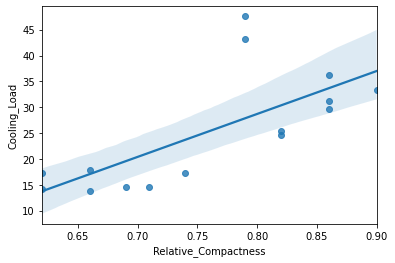

In [5]:
#select a sample of the dataset
simple_linear_reg_df = df[['Relative_Compactness', 'Cooling_Load']].sample(15, random_state=2)
#regression plot
sns.regplot(x="Relative_Compactness", y="Cooling_Load", data=simple_linear_reg_df)

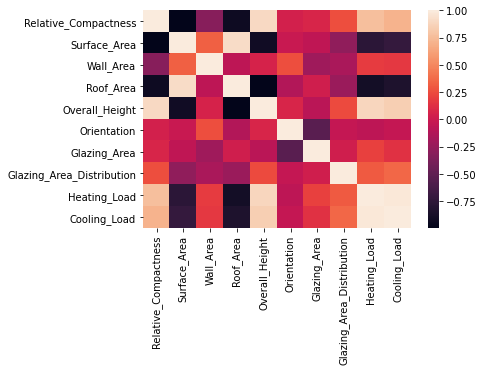

In [6]:
# the correllation of the residual energy
sample_corr_df = df.sample(15, random_state=2)
sns.heatmap(sample_corr_df.corr())

# Measuring Regression Performance
- Canculating the mean absolute error (MAE)


In [7]:
# first, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=['Heating_Load', 'Cooling_Load'])
heating_target = normalised_df['Heating_Load']

#normalised_df.head()
features_df.head()
#heating_target

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0


- Now, we split our dataset into the training and testing dataset.
- Recall that we had segmented the features and target variabls

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  = train_test_split(features_df, heating_target, test_size=0.3, random_state=1)


In [9]:
# create the linear regression model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

# train the model
linear_model.fit(x_train, y_train)
# obtain_predictions
predicted_values = linear_model.predict(x_test)

predicted_values


array([0.1854248 , 0.58349609, 0.7442627 , 0.71411133, 0.76220703,
       0.24438477, 0.16516113, 0.61010742, 0.2454834 , 0.55053711,
       0.31567383, 0.66394043, 0.69506836, 0.3013916 , 0.18859863,
       0.71777344, 0.57250977, 0.3137207 , 0.25585938, 0.74243164,
       0.70068359, 0.07214355, 0.6114502 , 0.32275391, 0.21496582,
       0.74853516, 0.32824707, 0.18103027, 0.79992676, 0.27026367,
       0.68493652, 0.73864746, 0.140625  , 0.28320312, 0.56604004,
       0.8067627 , 0.33032227, 0.13378906, 0.7232666 , 0.2479248 ,
       0.81970215, 0.15612793, 0.10632324, 0.1619873 , 0.11560059,
       0.1496582 , 0.4876709 , 0.69189453, 0.7578125 , 0.71960449,
       0.10009766, 0.66943359, 0.0994873 , 0.24475098, 0.76550293,
       0.76977539, 0.74108887, 0.63098145, 0.15380859, 0.29699707,
       0.18664551, 0.59667969, 0.60595703, 0.76672363, 0.56884766,
       0.92114258, 0.68395996, 0.31689453, 0.67382812, 0.23535156,
       0.546875  , 0.24597168, 0.23413086, 0.72436523, 0.28442

In [10]:
# Finally, finding the MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)

round(mae, 3)

0.063

- Calculate the residual sum of squares(RSS)

In [11]:
import numpy as np
rss = np.sum(np.square(y_test-predicted_values))

round(rss, 2)

1.83

- Calculate the root mean square error(RMSE)

In [12]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, predicted_values))

round(rmse, 3)

0.089

- Calculate R-squared

In [13]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)

round(r2_score, 3)

0.893

# Penalization Methods
- Calculate the Ridge Regression

In [14]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)


Ridge(alpha=0.4)

In [15]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, predicted_values))

round(rmse, 3)

0.089

- Least absolute shrinkage and selection operator regression(Lasso Regression)

In [16]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

- Comparing the effects of regularizations

In [17]:
def get_weights_df(model, feat, col_name):
    # this function returns the weight of every features
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns=['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, "Ridge_Weights")
lasso_weights_df = get_weights_df(lasso_reg, x_train, "Lasso_Weights")

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on="Features")
final_weights = pd.merge(final_weights, lasso_weights_df, on="Features")

final_weights

,Features,Linear_Model_Weight,Ridge_Weights,Lasso_Weights
0,Surface_Area,-3.952735e+12,-0.075215,0.000000
1,Relative_Compactness,-5.884388e-01,-0.310372,-0.027719
2,Orientation,3.669739e-03,0.003366,0.000000
3,Glazing_Area_Distribution,2.793455e-02,0.028939,0.021431
4,Glazing_Area,2.143736e-01,0.212870,0.206132
5,Overall_Height,3.935547e-01,0.441370,0.463482
6,Wall_Area,2.305762e+12,0.095452,0.200087
7,Roof_Area,2.964552e+12,-0.174527,-0.000000


# Energy Model Prediction and validating the model      

In [32]:
# Read the data
X_full = pd.read_csv('energydata_complete.csv')

# Remove rows with missing targets
X_full.dropna(axis=0, subset=['Appliances'], inplace=True)

# Drop date and lights columns
X_full.drop(['date', 'lights'], axis=1, inplace=True)


- Preprocessing the data and train the model

In [38]:
# first, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

normalised_X = pd.DataFrame(scaler.fit_transform(X_full), columns=X_full.columns)

# Separating the target from predictores
X = normalised_X.drop(columns=['Appliances'], axis=1)
y = normalised_X['Appliances']


In [39]:
# Inspect the X data
X.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,0.381070,0.841827,0.170594,0.653428,0.173329,0.661412,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,0.375443,0.839872,0.170594,0.651064,0.173329,0.660155,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,0.367487,0.830704,0.170594,0.646572,0.173329,0.655586,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,0.380037,0.363800,0.833401,0.164310,0.641489,0.164175,0.650788,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,0.380037,0.361859,0.848264,0.170594,0.639362,0.164175,0.650788,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [41]:
# Split our data into the training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=1)

In [59]:
# Select our model and train the model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
my_model = LinearRegression()

ridge_reg = Ridge(alpha=0.04)
lasso_reg = Lasso(alpha=0.001)
# Train the model
my_model.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)
# predict the model
preds = my_model.predict(X_test)

- Model validation
- Measure performance and quality of our model using some performance metrics


In [55]:
# importing libraries
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Findinng r-squared in two decimal point 
r2_score = r2_score(y_test, preds)

round(r2_score, 2)

0.16

In [56]:
# Finding the mean absolute error
mae = mean_absolute_error(y_test, preds)

round(mae, 2)

0.05

In [46]:
# Finding th residual sum of squared
import numpy as np
rss = np.sum(np.square(y_test-preds))

round(rss, 2)

46.1

In [49]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, preds))

round(rmse, 2)


0.09

In [57]:
my_model.coef_

array([ 5.96019431e-03,  5.35728498e-01, -2.49753031e-01, -4.58087654e-01,
        2.93201561e-01,  9.55003180e-02,  2.74103899e-02,  2.66875929e-02,
        1.25455635e-02,  1.62839134e-02,  2.49016190e-01,  3.80971741e-02,
        1.25710426e-02, -4.76674651e-02,  8.84858378e-02, -1.56432558e-01,
       -2.04665781e-01, -3.61097749e-02, -3.30273756e-01,  4.61625673e-03,
       -7.61831057e-02,  2.79025531e-02,  1.09911339e-02,  1.19397056e-01,
       -1.46431982e+11,  1.46431982e+11])

In [63]:
def get_weights_df(model, feat, col_name):
    # this function returns the weight of every features
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns=['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

model_weights = get_weights_df(my_model, X_train, 'Linear_Model_Weight')

ridge_weights_df = get_weights_df(ridge_reg, X_train, "Ridge_Weights")
lasso_weights_df = get_weights_df(lasso_reg, X_train, "Lasso_Weights")

final_weights = pd.merge(model_weights, ridge_weights_df, on="Features")
final_weights = pd.merge(final_weights, lasso_weights_df, on="Features")

final_weights

,Features,Linear_Model_Weight,Ridge_Weights,Lasso_Weights
0,rv1,-1.464320e+11,-0.000351,-0.000000
1,RH_2,-4.580877e-01,-0.453143,-0.000000
2,T_out,-3.302738e-01,-0.322927,0.000000
3,T2,-2.497530e-01,-0.245911,0.000084
4,T9,-2.046658e-01,-0.204608,-0.000000
5,RH_8,-1.564326e-01,-0.156489,-0.000000
6,RH_out,-7.618311e-02,-0.073281,-0.047062
7,RH_7,-4.766747e-02,-0.047735,-0.000000
8,RH_9,-3.610977e-02,-0.036227,-0.000000
9,Press_mm_hg,4.616257e-03,0.004618,-0.000000
